In [1]:
import gc

import tensorflow as tf

url = 'https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip'
name = 'fruits360'
file = tf.keras.utils.get_file(name, url, extract=True)
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import os

# 指定訓練資料夾目錄
training_path = os.path.sep.join(file.split(os.path.sep)[0:-1] + ['Fruit-Images-Dataset-master', 'Training'])

# 指定測試資料夾目錄
test_path = os.path.sep.join(file.split(os.path.sep)[0:-1] + ['Fruit-Images-Dataset-master', 'Test'])

In [3]:
print(training_path)
print(test_path)

C:\Users\choug\.keras\datasets\Fruit-Images-Dataset-master\Training
C:\Users\choug\.keras\datasets\Fruit-Images-Dataset-master\Test


In [4]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from IPython.display import display
def show_model(model,figsize=(20,20)):
    a = plot_model(model,'models/' + model.name +'.png', show_shapes=True, dpi=300)
    display(a)
    return

# 載入訓練資料

In [5]:
from tensorflow.keras.utils import image_dataset_from_directory

# 訓練資料集
train_dataset = image_dataset_from_directory(training_path,
                                             batch_size=32,
                                             image_size=(100, 100),
                                             validation_split=0.1,
                                             shuffle=True,
                                             label_mode='categorical',
                                             seed=123,
                                             subset='training')

# 驗證資料集
validation_dataset = image_dataset_from_directory(training_path,
                                                  batch_size=32,
                                                  image_size=(100, 100),
                                                  validation_split=0.1,
                                                  shuffle=True,
                                                  label_mode='categorical',
                                                  seed=123,
                                                  subset='validation')

#測試資料集
test_dataset = image_dataset_from_directory(test_path,
                                            batch_size=32,
                                            label_mode='categorical',
                                            image_size=(100, 100))





Found 67692 files belonging to 131 classes.
Using 60923 files for training.
Found 67692 files belonging to 131 classes.
Using 6769 files for validation.
Found 22688 files belonging to 131 classes.


In [6]:
test_dataset.take(1)

<TakeDataset shapes: ((None, 100, 100, 3), (None, 131)), types: (tf.float32, tf.float32)>

In [7]:
for image, label in train_dataset.take(1):
    print('image shape:', image.shape)
    print('label shape:', label.shape)
    print(label[1])

image shape: (32, 100, 100, 3)
label shape: (32, 131)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(131,), dtype=float32)


# 建立簡單模型

In [8]:


# inputs = keras.Input(shape=(100, 100, 3))
# x = layers.Rescaling(1. / 255)(inputs)
# x = layers.Conv2D(32, 3, activation='relu')(x)
# x = layers.MaxPooling2D()(x)
# x = layers.Conv2D(64, 3, activation='relu')(x)
# x = layers.MaxPooling2D()(x)
# x = layers.Conv2D(128, 3, activation='relu')(x)
# x = layers.Conv2D(256, 3, activation='relu')(x)
# x = layers.Conv2D(256, 3, activation='relu')(x)
# x = layers.Flatten()(x)
# x = layers.Dense(256, activation='relu')(x)
# x = layers.Dense(256, activation='relu')(x)
# outputs = layers.Dense(131, activation='softmax')(x)
#
# model = keras.Model(inputs, outputs)
#
# model.summary()

In [9]:
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [10]:
# callbacks = [
#     tf.keras.callbacks.ModelCheckpoint(
#         filepath='models/fruit_first_model.keras',
#         monitor='val_loss',
#         save_best_only=True,
#         verbose=1
#     )
# ]

In [11]:
# model.fit(train_dataset,
#           epochs=10,
#           validation_data=validation_dataset,
#           callbacks=callbacks)

In [12]:
# model.evaluate(test_dataset)

# 遷移式學習

In [13]:
vgg_base = keras.applications.VGG16(include_top=False,
                                    weights='imagenet',
                                    input_shape=(100, 100, 3))
vgg_base.trainable = False
print(len(vgg_base.trainable_weights))

0


In [14]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1)
], name='data_augmentation')


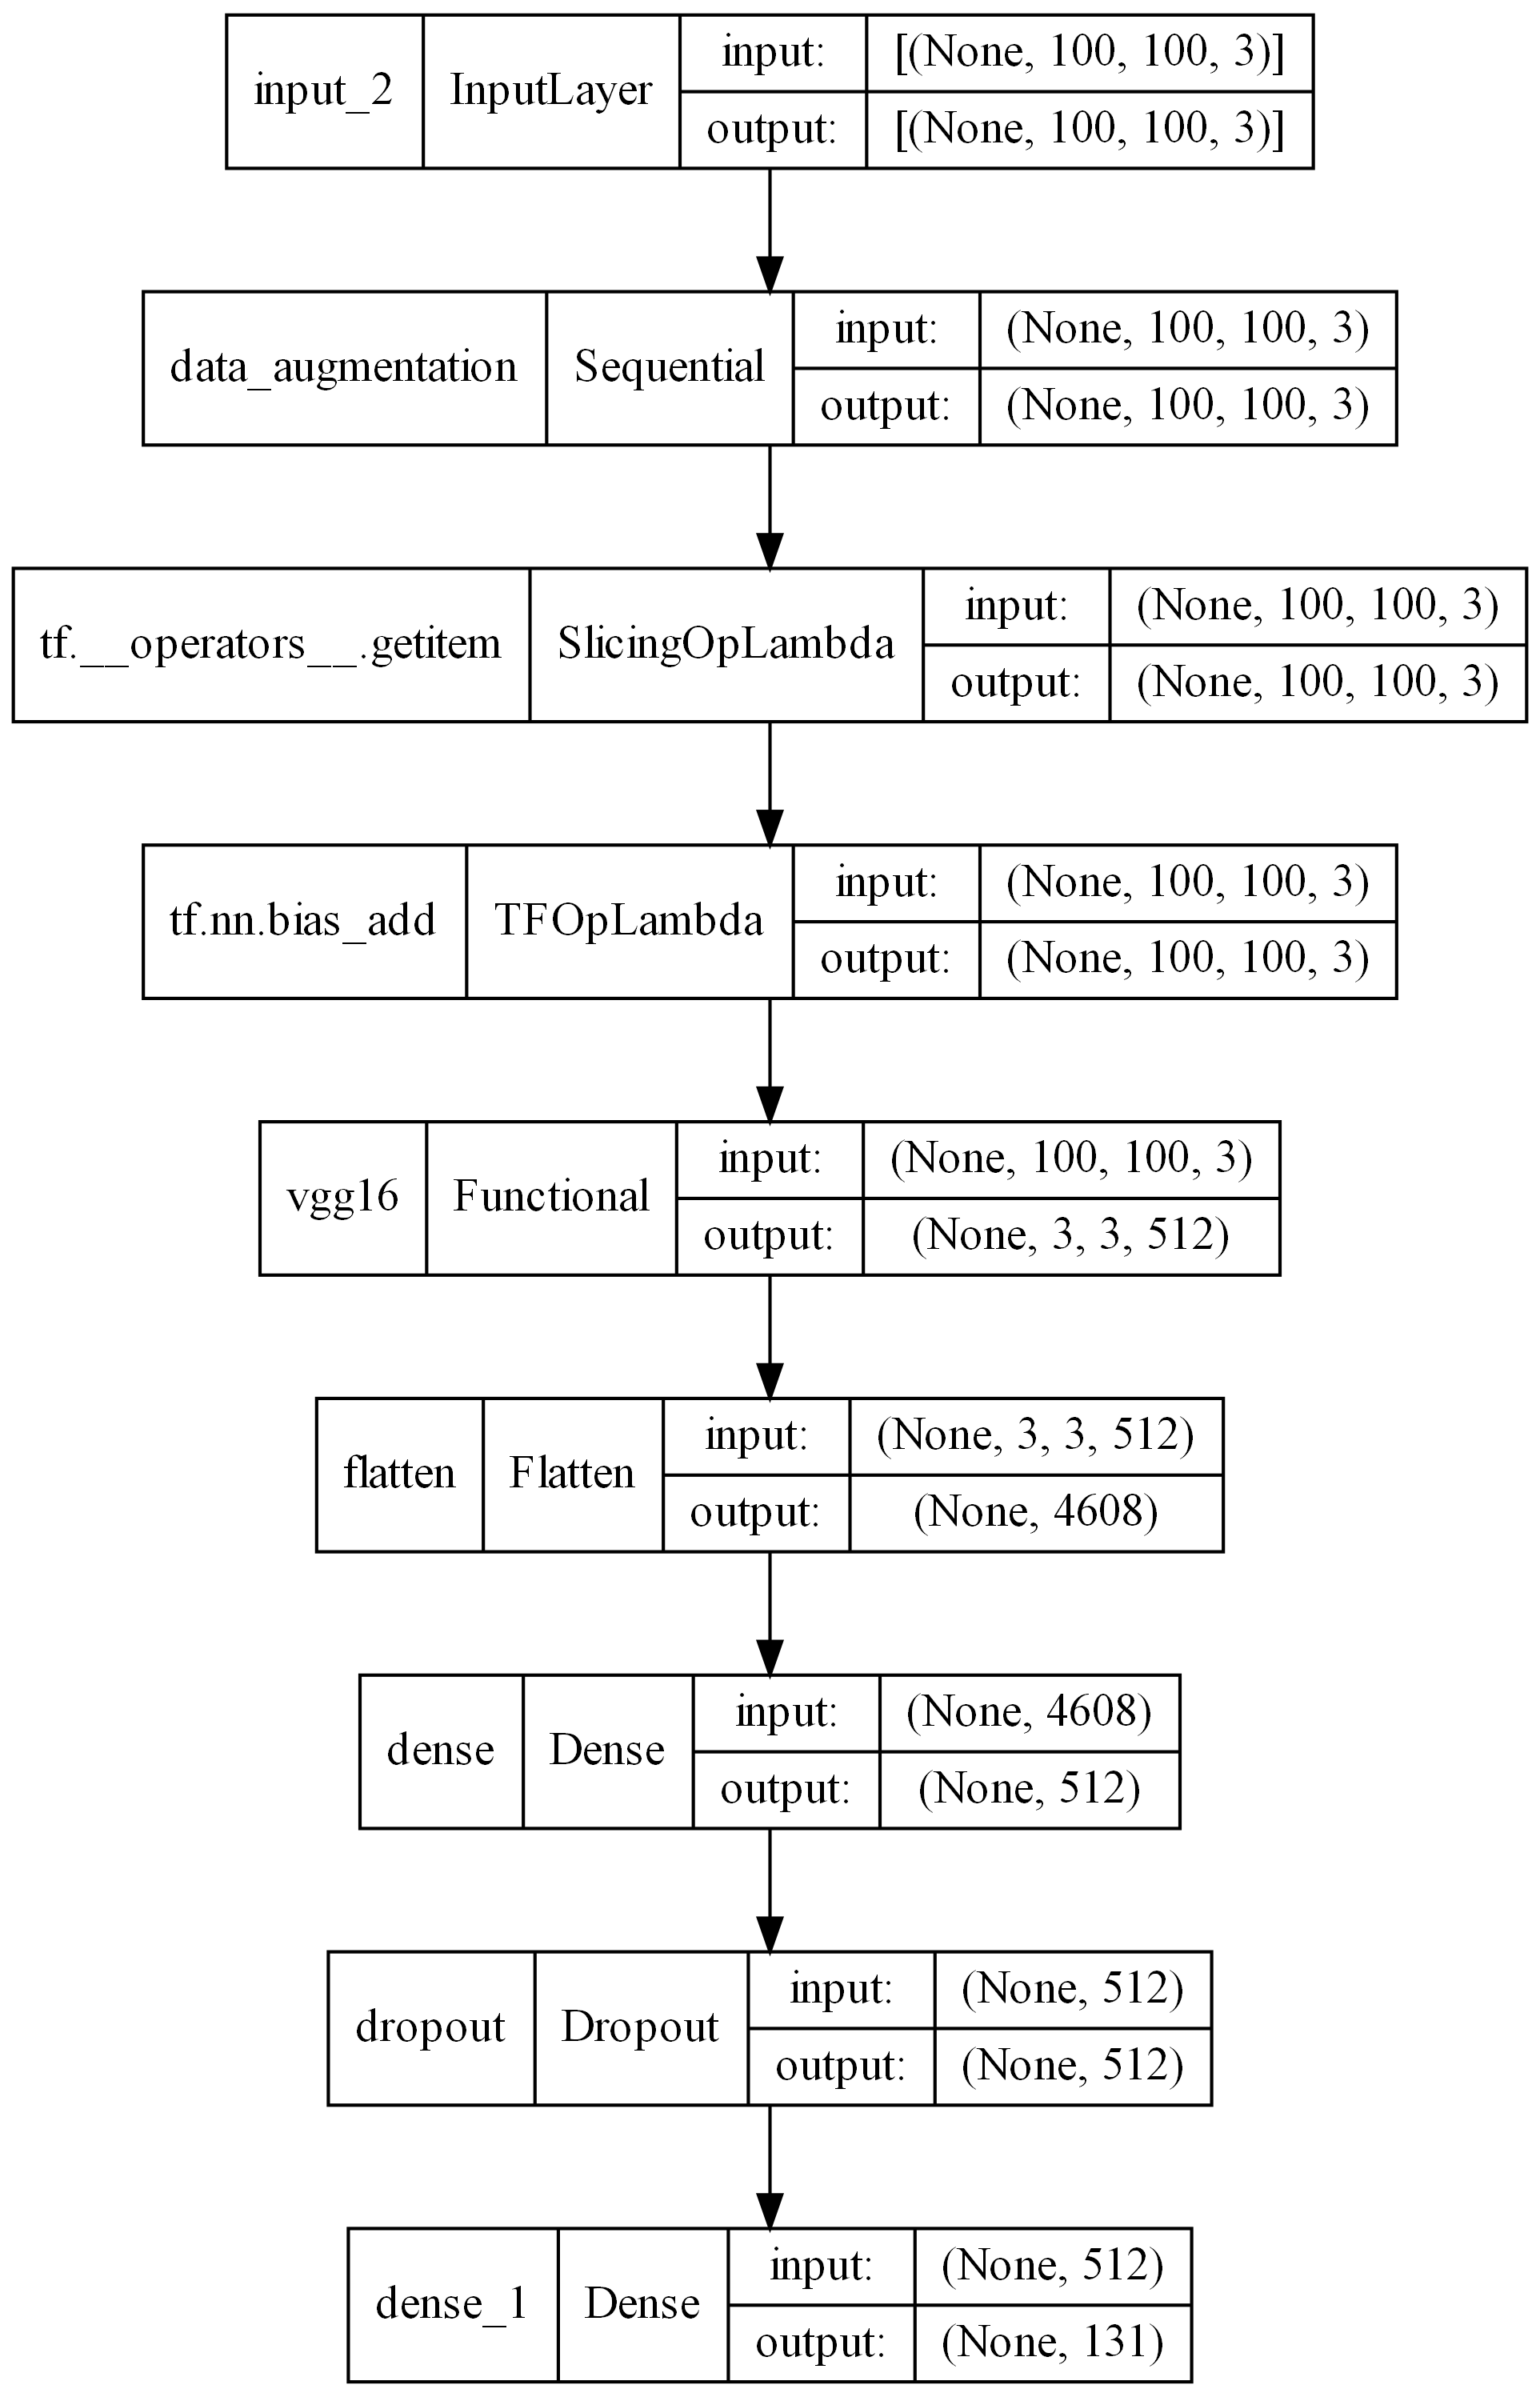

In [15]:
inputs = keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = vgg_base(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation = 'relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(131, activation='softmax')(x)
model = keras.Model(inputs, outputs)
show_model(model)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 100, 100, 3)      0         
 al)                                                             
                                                                 
 tf.__operators__.getitem (S  (None, 100, 100, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 100, 100, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0     

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
transfer_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='models/fruit_transfer_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]

In [19]:
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=validation_dataset,
                    callbacks=transfer_callbacks)

Epoch 1/50
1904/1904 [==============================] - ETA: 0s - loss: 1.3085 - accuracy: 0.7467
Epoch 00001: val_loss improved from inf to 0.22976, saving model to models\fruit_transfer_model.keras
1904/1904 [==============================] - 101s 51ms/step - loss: 1.3085 - accuracy: 0.7467 - val_loss: 0.2298 - val_accuracy: 0.9473
Epoch 2/50
1903/1904 [============================>.] - ETA: 0s - loss: 0.6304 - accuracy: 0.8688
Epoch 00002: val_loss improved from 0.22976 to 0.18048, saving model to models\fruit_transfer_model.keras
1904/1904 [==============================] - 99s 52ms/step - loss: 0.6305 - accuracy: 0.8688 - val_loss: 0.1805 - val_accuracy: 0.9631
Epoch 3/50
1903/1904 [============================>.] - ETA: 0s - loss: 0.5847 - accuracy: 0.8928
Epoch 00003: val_loss improved from 0.18048 to 0.08018, saving model to models\fruit_transfer_model.keras
1904/1904 [==============================] - 97s 51ms/step - loss: 0.5847 - accuracy: 0.8928 - val_loss: 0.0802 - val_acc

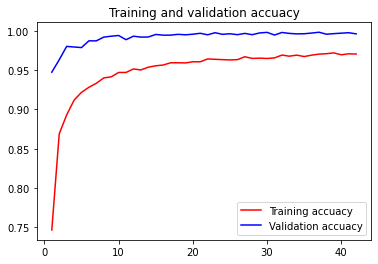

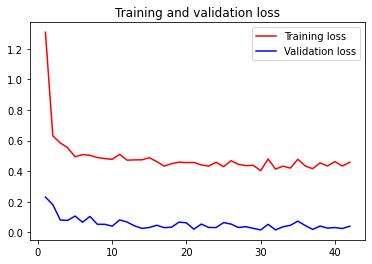

In [20]:
#畫出accuracy 和 loss
import matplotlib.pyplot as plt
accuacy = history.history['accuracy']
val_accuacy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuacy) + 1)
plt.plot(epochs, accuacy, 'r', label='Training accuacy')
plt.plot(epochs, val_accuacy, 'b', label='Validation accuacy')
plt.title('Training and validation accuacy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
test_model = keras.models.load_model('models/fruit_transfer_model.keras')
test_loss, test_accuracy = test_model.evaluate(test_dataset)
print(f"test accuracy: {test_accuracy:.3f}")


709/709 [==============================] - 31s 43ms/step - loss: 4.6921 - accuracy: 0.9609
test accuracy: 0.961


In [22]:
del model
del test_model
gc.collect()

11151

# 自己建立模型

In [23]:
def residual_block(x_input, filters,pooling=False):
    residual_x = x_input
    x_input = layers.Conv2D(filters, 3, activation='relu', padding='same')(x_input)
    x_input = layers.Conv2D(filters, 3, activation='relu', padding='same')(x_input)
    if pooling: #如果要pooling 要確保輸入輸出filter數一樣
        x_input = layers.MaxPooling2D(2, padding='same')(x_input)
        residual_x = layers.Conv2D(filters, 1, strides=2)(residual_x)
    elif filters != residual_x.shape[-1]:  #確保輸入輸出filter數一樣
        residual_x = layers.Conv2D(filters, 1)(residual_x)
    x_input = layers.add([x_input, residual_x])
    return x_input

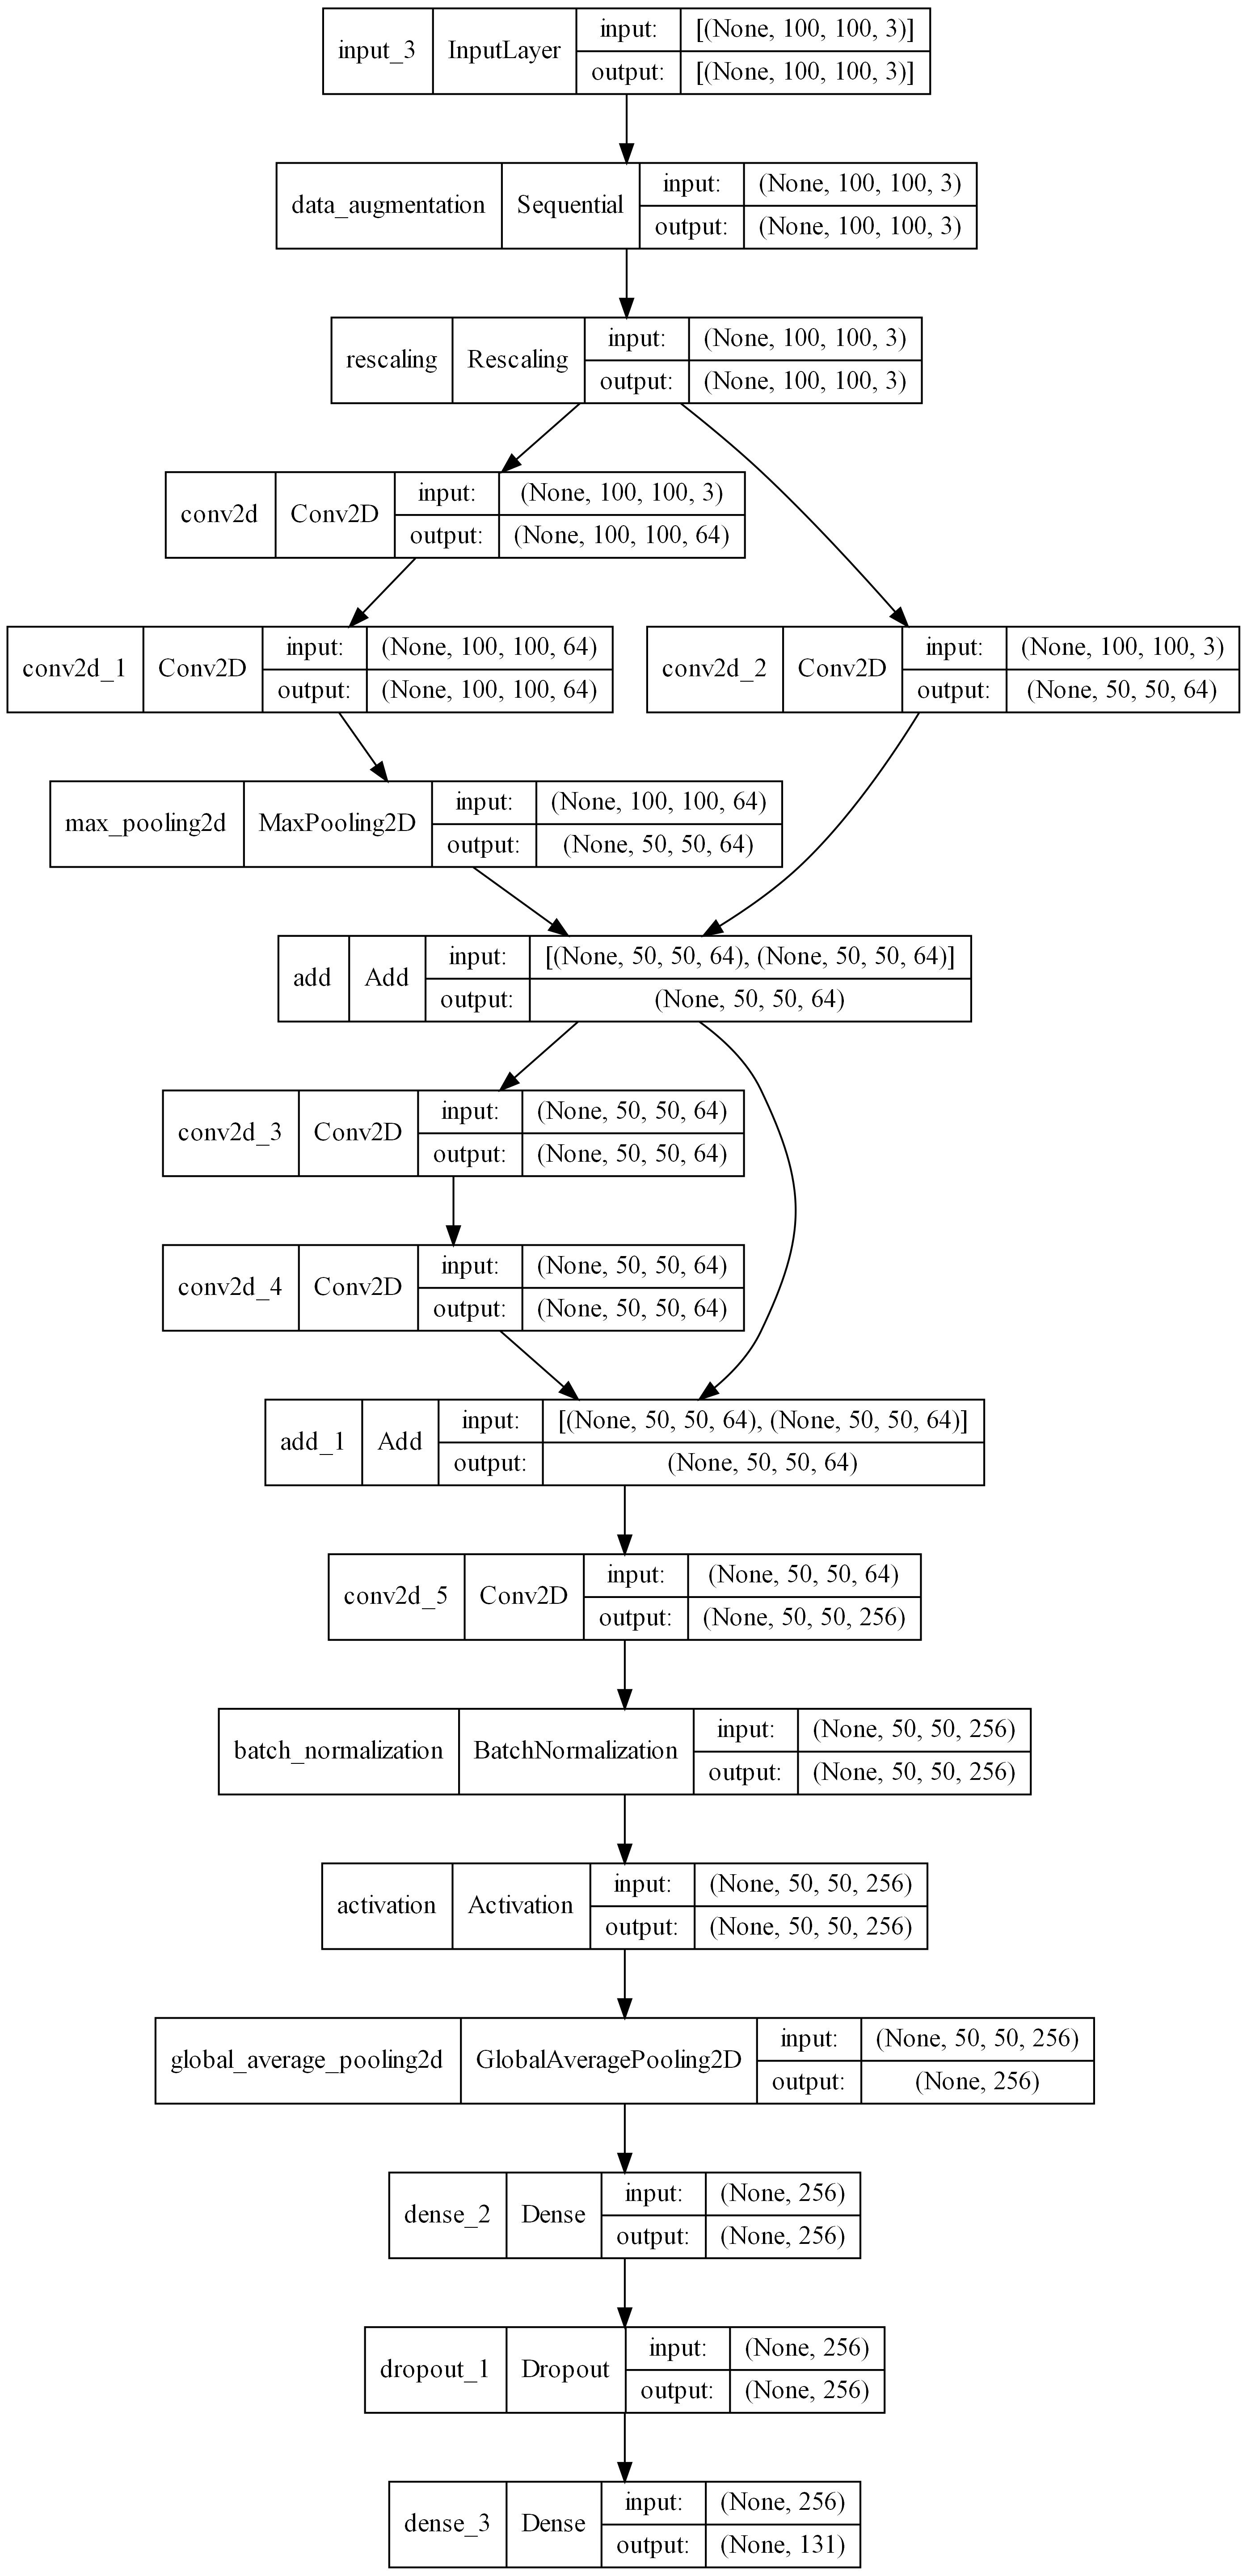

In [24]:
inputs = keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1. / 255)(x)
x = residual_block(x, 64, pooling=True)
x = residual_block(x, 64, pooling=False)
x = layers.Conv2D(256, 3, use_bias=False , padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(131, activation='softmax')(x)
my_model = keras.Model(inputs, outputs)
show_model(my_model)

In [25]:
my_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 100, 100, 3)  0          ['input_3[0][0]']                
                                                                                                  
 rescaling (Rescaling)          (None, 100, 100, 3)  0           ['data_augmentation[1][0]']      
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 64  1792        ['rescaling[0][0]']        

In [26]:
my_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
my_model_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='models/fruit_my_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
    ,
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
]

In [28]:
my_model_history = my_model.fit(train_dataset,
                    epochs=50,
                    validation_data=validation_dataset,
                    callbacks=my_model_callbacks)

Epoch 1/50
1904/1904 [==============================] - ETA: 0s - loss: 1.1357 - accuracy: 0.6570
Epoch 00001: val_loss improved from inf to 0.34380, saving model to models\fruit_my_model.keras
1904/1904 [==============================] - 157s 81ms/step - loss: 1.1357 - accuracy: 0.6570 - val_loss: 0.3438 - val_accuracy: 0.8800
Epoch 2/50
   1/1904 [..............................] - ETA: 3:53 - loss: 0.3630 - accuracy: 0.9062

C:\Users\choug\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


1904/1904 [==============================] - ETA: 0s - loss: 0.2908 - accuracy: 0.9012
Epoch 00002: val_loss did not improve from 0.34380
1904/1904 [==============================] - 149s 78ms/step - loss: 0.2908 - accuracy: 0.9012 - val_loss: 0.4146 - val_accuracy: 0.8696
Epoch 3/50
1904/1904 [==============================] - ETA: 0s - loss: 0.1688 - accuracy: 0.9433
Epoch 00003: val_loss improved from 0.34380 to 0.19199, saving model to models\fruit_my_model.keras
1904/1904 [==============================] - 142s 75ms/step - loss: 0.1688 - accuracy: 0.9433 - val_loss: 0.1920 - val_accuracy: 0.9439
Epoch 4/50
1904/1904 [==============================] - ETA: 0s - loss: 0.1197 - accuracy: 0.9600
Epoch 00004: val_loss improved from 0.19199 to 0.06799, saving model to models\fruit_my_model.keras
1904/1904 [==============================] - 141s 74ms/step - loss: 0.1197 - accuracy: 0.9600 - val_loss: 0.0680 - val_accuracy: 0.9772
Epoch 5/50
1904/1904 [==============================] - ET

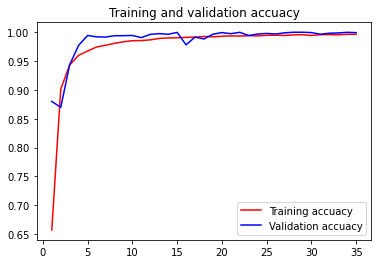

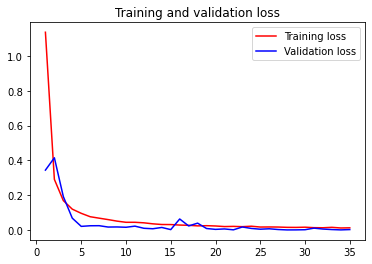

In [29]:
import matplotlib.pyplot as plt
accuacy = my_model_history.history['accuracy']
val_accuacy = my_model_history.history['val_accuracy']
loss = my_model_history.history['loss']
val_loss = my_model_history.history['val_loss']
epochs = range(1, len(accuacy) + 1)
plt.plot(epochs, accuacy, 'r', label='Training accuacy')
plt.plot(epochs, val_accuacy, 'b', label='Validation accuacy')
plt.title('Training and validation accuacy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
my_test_model = keras.models.load_model('models/fruit_my_model.keras')
test_loss, test_accuracy = my_test_model.evaluate(test_dataset)
print(f"test accuracy: {test_accuracy:.3f}")

709/709 [==============================] - 16s 22ms/step - loss: 0.0543 - accuracy: 0.9904
test accuracy: 0.990
